<span style="font-size: larger;">**Importing all the basic libraries**.</span>

In [1]:
import numpy as np

In [2]:
import seaborn as sb

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
cdata=pd.read_csv('Customers.csv')

In [7]:
cdata

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [8]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [15]:
nullrows=cdata[cdata.isnull().any(axis=1)]
print(nullrows)

      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
79            80  Female   49              98000                      42   
118          119  Female   51              84000                      43   
219          220  Female   59              76000                      61   
237          238    Male   95              36000                      35   
437          438    Male   76             136259                      14   
440          441  Female    0              57373                      29   
498          499    Male   95             121725                       3   
545          546  Female   89             107359                      26   
601          602    Male   61             126370                      20   
641          642    Male   66             121377                      19   
665          666    Male   28             101414                      64   
703          704    Male   22             114011                      40   
801         

<span style="font-size: larger;">**Data Preprocessing**.</span>

In [16]:
nullrows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 79 to 1932
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              35 non-null     int64 
 1   Gender                  35 non-null     object
 2   Age                     35 non-null     int64 
 3   Annual Income ($)       35 non-null     int64 
 4   Spending Score (1-100)  35 non-null     int64 
 5   Profession              0 non-null      object
 6   Work Experience         35 non-null     int64 
 7   Family Size             35 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 2.5+ KB


In [17]:
finald=cdata.dropna()

In [23]:
checkfornulls=finald[finald.isnull().any(axis=1)]

In [24]:
checkfornulls

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size


In [25]:
finald.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


<span style="font-size: larger;">**Data Visualization**.</span>

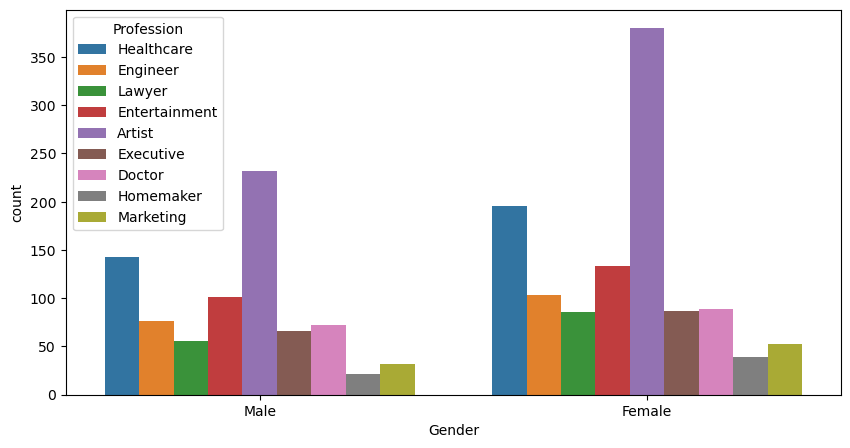

In [278]:
plt.figure(figsize=(10,5))
sb.countplot(x='Gender',data=finald,hue='Profession')
hue_legend=plt.legend(title='Profession',loc='upper left')

<Axes: xlabel='Profession', ylabel='Spending Score (1-100)'>

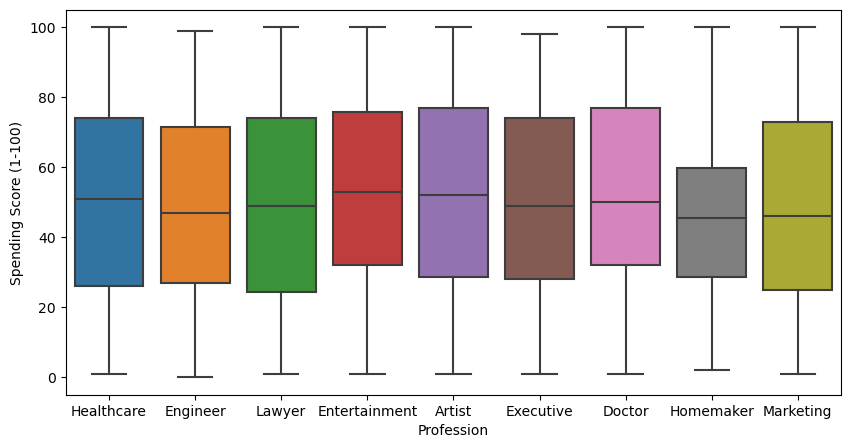

In [133]:
plt.figure(figsize=(10,5))
sb.boxplot(x='Profession',y='Spending Score (1-100)',data=finald)

In [193]:
finald.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,clusterdata
0,1,Male,19,15000,39,Healthcare,1,4,2
1,2,Male,21,35000,81,Engineer,3,3,1
2,3,Female,20,86000,6,Engineer,1,1,4
3,4,Female,23,59000,77,Lawyer,0,2,1
4,5,Female,31,38000,40,Entertainment,2,6,2


<span style="font-size: larger;">**Reordering the columns**.</span>

In [279]:
finald=finald[['CustomerID','Age','Spending Score (1-100)','Annual Income ($)','Profession','Work Experience','Gender','Family Size','clusterdata']]

In [280]:
finald.head()

,CustomerID,Age,Spending Score (1-100),Annual Income ($),Profession,Work Experience,Gender,Family Size,clusterdata
0,1,19,39,15000,Healthcare,1,Male,4,6
1,2,21,81,35000,Engineer,3,Male,3,0
2,3,20,6,86000,Engineer,1,Female,1,10
3,4,23,77,59000,Lawyer,0,Female,2,0
4,5,31,40,38000,Entertainment,2,Female,6,6


<span style="font-size: larger;">**Feature selection(it's subjective and done accroding to our target criteria)**.</span>

In [281]:
x=finald.iloc[:,1:3]

In [282]:
x

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
1995,71,40
1996,91,32
1997,87,14
1998,77,4


<span style="font-size: larger;">**Importing kMeans library and preprocessing libraries for standardization**.</span>

In [359]:
from sklearn.cluster import KMeans

In [360]:
from sklearn import preprocessing

<span style="font-size: larger;">**The no:of clusters is selected by elbow method which is performed below**.</span>

In [365]:
km=KMeans(10)

In [366]:
x_scaled=preprocessing.scale(x)

In [367]:
clusters=km.fit_predict(x_scaled)

/Users/raviirt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



<span style="font-size: larger;">**Wcss value as per the above given no:of clusters**.</span>

In [368]:
km.inertia_

399.19569335036476

<span style="font-size: larger;">**Wcss value can be minimized a bit more in general**.</span>

In [369]:
finald['clusterdata']=clusters

In [370]:
finald

,CustomerID,Age,Spending Score (1-100),Annual Income ($),Profession,Work Experience,Gender,Family Size,clusterdata
0,1,19,39,15000,Healthcare,1,Male,4,3
1,2,21,81,35000,Engineer,3,Male,3,7
2,3,20,6,86000,Engineer,1,Female,1,0
3,4,23,77,59000,Lawyer,0,Female,2,7
4,5,31,40,38000,Entertainment,2,Female,6,9
...,...,...,...,...,...,...,...,...,...
1995,1996,71,40,184387,Artist,8,Female,7,1
1996,1997,91,32,73158,Doctor,7,Female,7,8
1997,1998,87,14,90961,Healthcare,9,Male,2,8
1998,1999,77,4,182109,Executive,7,Male,2,8


Text(0, 0.5, 'Spending score')

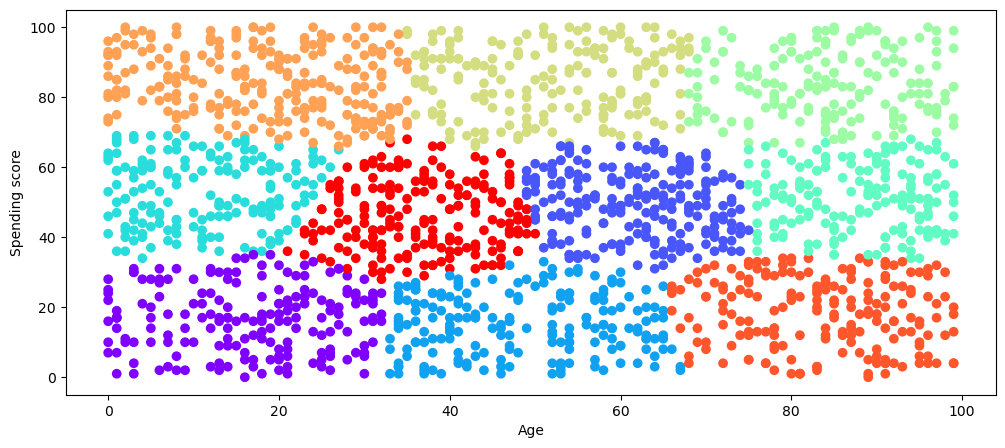

In [373]:
plt.figure(figsize=(12,5))
plt.scatter(finald['Age'],finald['Spending Score (1-100)'],c=finald['clusterdata'],cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Spending score')

<span style="font-size: larger;">**choosing k value using elbow method**.</span>

In [374]:
wcss=[]
for i in range(1,11):
    km=KMeans(i)
    km.fit(x_scaled)
    wcss_new=km.inertia_
    wcss.append(wcss_new)

/Users/raviirt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/raviirt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/raviirt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/raviirt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/raviirt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_k

In [375]:
wcss

[3930.0,
 2457.864597117531,
 1535.537818992734,
 1035.2678188368513,
 849.0126164879591,
 704.8029676138483,
 586.297912731332,
 512.5753636623216,
 444.2853855121763,
 399.3454178926801]

Text(0, 0.5, 'wcss')

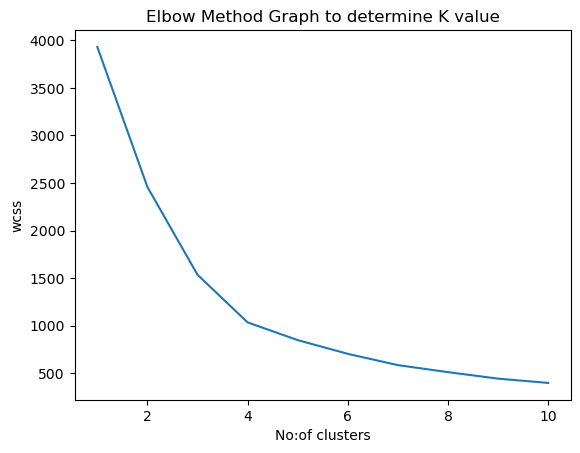

In [377]:
no=range(1,11)
plt.plot(no,wcss)
plt.title('Elbow Method Graph to determine K value')
plt.xlabel('No:of clusters')
plt.ylabel('wcss')